`

# <p style="text-align:center" color="red"><span style="color:red">`Research Methodologies project`</span></p>
## <p style="text-align:center" color="red"><span style="color:green">ChemNLP: A Natural Language Processing based Library for Materials Chemistry Text Data
</span></p>
## <p style="text-align:center" color="red"><span style="color:red">Part 1 : Data Foundations: Preprocessing and Embedding in Chemical Informatics</span></p>


**Membres du Groupe :**

- Abir Oumghar - `AMSD`
- Meryem Belkaid - `AMSD`
- Hafsa Boanani - `AMSD`


### Install required libraries

In [1]:
#!pip install torch torchvision torchaudio transformers tqdm pandas scikit-learn matplotlib nltk

### Import the required libraries

In [2]:
# Standard Library Imports
import warnings
warnings.filterwarnings('ignore')

import pickle
import re

# External Library Imports
import numpy as np
import pandas as pd
import torch
from tqdm.auto import tqdm # The tqdm library is utilized for displaying progress bars during lengthy operations
from transformers import AutoTokenizer, AutoModelForMaskedLM, AutoModel

# NLTK Imports
from nltk.corpus import stopwords # nltk stopwords are loaded for text preprocessing

# Additional setup
tqdm.pandas()
stop_words = set(stopwords.words('english'))

# Dimension Reduction and Clustering 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import umap  
import matplotlib.pyplot as plt
import numpy as np

# Plotly library 
import plotly.graph_objs as go
from plotly.offline import iplot

### Cleaning the CSV file

Preprocessing Summary and its Importance for NLP and Machine Learning Analysis
Ensuring Data Cleanliness and Correct Formatting

- **Data Cleanliness:** The initial steps in the preprocessing script are crucial for ensuring that the dataset is devoid of any formatting errors or inconsistencies that could potentially skew the analysis or lead to incorrect conclusions. Cleaning the data involves removing unnecessary characters, correcting misformatted lines, and standardizing the dataset's structure.
- **Correct Formatting:** Properly formatting the dataset facilitates easier manipulation and analysis within Python's data analysis libraries such as pandas. By standardizing column headers and ensuring that each row adheres to a consistent format, we lay a solid foundation for the reliable application of NLP techniques.


The clean and correctly formatted data, once encoded into meaningful vectors via BERT and reduced to a manageable number of dimensions, is then ready for clustering analysis. The application of K-means clustering will segment the dataset into groups based on similarity, facilitating the discovery of inherent structures or themes within the data.

In [3]:
# Dataset Loading and Preprocessing
  def process_and_save_csv(file_path):
#     """
#     Process a CSV file by applying the following rules:
#     - Replace occurrences of three consecutive spaces (   ) with '","'
#     - If the first line, replace it with 'id_0,id_1,title,abstract'
#     - If a line contains only a double quote, append the quote to the previous line.
#     - If a line starts with '",' (double quote followed by comma), append the quote to the previous line and replace '",' with 'None,' for the current line.
#     """
      with open(file_path, 'r', encoding='utf-8') as file:
          lines = file.readlines()

      processed_lines = []
      for i in range(len(lines)):
          line = lines[i].rstrip('\n').replace('   ', '","')

          if i == 0:
              processed_lines.append('id_0,id_1,title,abstract')
              continue

          if line == '"':
              if processed_lines:
                  processed_lines[-1] += '"'
          elif line.startswith('",'):
              if processed_lines:
                  processed_lines[-1] += '"'
              line = 'None,' + line[2:]
              processed_lines.append(line)
          else:
              processed_lines.append(line)

      output_file_path = file_path.replace('.csv', '_processed.csv')
      with open(output_file_path, 'w', encoding='utf-8') as file:
          for line in processed_lines:
              file.write(line + '\n')

      return output_file_path

# function takes the processed CSV file and performs additional adjustments to ensure uniform formatting
  def enhance_csv_formatting(file_path):
#     """
#     Processes each line of a CSV file to ensure specific formatting rules and writes the processed lines to a new file.
    
#     The processing rules are as follows:
#     1. Lines starting with 'None,' are processed by encapsulating 'None' and the subsequent field in quotes.
#        The rest of the line, if present, is appended as is.
#     2. Lines starting with a digit are processed by encapsulating the first two fields in quotes.
#        The rest of the line, if present, is appended as is.
#     3. Newline characters at the end of each line are stripped before processing and re-added when writing to the new file.
    
#     The modified lines are written to a new file with '_enhanced.csv' appended to the original filename.
#     """
      with open(file_path, 'r', encoding='utf-8') as file:
          lines = file.readlines()

      processed_lines = []
      for line in lines:
          line = line.rstrip('\n')
          if line.startswith('None,'):
              parts = line.split(',', 2)
              if len(parts) >= 2:
                  new_line = f'"None","{parts[1]}",'
                  if len(parts) > 2:
                      new_line += parts[2]
                  line = new_line
          elif line.split(',', 1)[0].isdigit():
              parts = line.split(',', 2)
              if len(parts) >= 2:
                  new_line = f'"{parts[0]}","{parts[1]}",'
                  if len(parts) > 2:
                      new_line += parts[2]
                  line = new_line
          processed_lines.append(line)

      output_file_path = file_path.replace('.csv', '_enhanced.csv')
      with open(output_file_path, 'w', encoding='utf-8') as file:
          for line in processed_lines:
              file.write(line + '\n')

      return output_file_path

#  reads the file into a pandas DataFrame

  def process_dataframe(file_path):
# Read the CSV file
      df = pd.read_csv(file_path, quotechar='"', on_bad_lines='skip')

# Remove 'id_0' and 'id_1' columns
      df.drop(['id_0'], axis=1, inplace=True)

# Remove duplicates based on the 'title' column
      df.drop_duplicates(subset=['title'], keep='last', inplace=True)

# Filter the columns
      df['id_1'] = df['id_1'].fillna('')  
      df = df.query("id_1.str.startswith('cond-mat')")

# Save the dataframe to TSV
      output_file_path = 'cond_mat_final.tsv'
      df.to_csv(output_file_path, sep='\t', index=False)
      print(f"Processed dataframe saved to {output_file_path}")


  original_file_path = 'C://Users//ABIR°S ELITEBOOK//Downloads//cond_mat.csv'
  process_and_save_csv(original_file_path)

  processed_file_path = 'cond_mat_processed.csv'
  enhance_csv_formatting(processed_file_path)

  dataframe_path = 'cond_mat_processed_enhanced.csv'
  process_dataframe(dataframe_path)

### Loading the cleaned TSV file

In [4]:
# Load the dataframe from the CSV file
df = pd.read_csv('cond_mat_final.tsv', sep='\t')

# Display the first few rows of the dataframe
df

,id_1,title,abstract
0,cond-mat.mes-hall,Room Temperature All Semiconducting sub-10nm G...,Sub-10nm wide graphene nanoribbon field-effect...
1,cond-mat.mtrl-sci,Dynamics of Current and Field Driven Domain Wa...,The dynamics of transverse Neel domain wall in...
2,cond-mat.mtrl-sci,Nitrogen-Functionalized Graphene Nanoflakes (G...,This study investigates the strong photolumine...
3,cond-mat.mtrl-sci,Local exact exchange potentials within the all...,We present a general numerical approach to con...
4,cond-mat.supr-con,Tuning magnetic confinement of spin-triplet su...,Electrical magnetoresistance and tunnel diode ...
...,...,...,...
86844,cond-mat.stat-mech,Construction of equilibrium networks with an e...,We construct equilibrium networks by introduci...
86845,cond-mat.mes-hall,Thermally-Activated Magnetic Reversal Induced ...,We have measured the statistical properties of...
86846,cond-mat.str-el,Formation of an incoherent metallic state in R...,Sr$_2$IrO$_4$ is the archetype of the spin-orb...
86847,cond-mat.mtrl-sci,CdS nanoparticles capped with 1-substituted 5-...,"We propose a new type of surfactants, namely, ..."


### Vizualizing the number of classes ( the labels )

In our dataset visualization of`Abstract Categories Frequency`, we employed a horizontal bar chart to depict the frequency of abstract categories, plotted using the value_counts() method on the `id_1` column, which contains the abstract categories utilizing matplotlib for clarity and aesthetic appeal

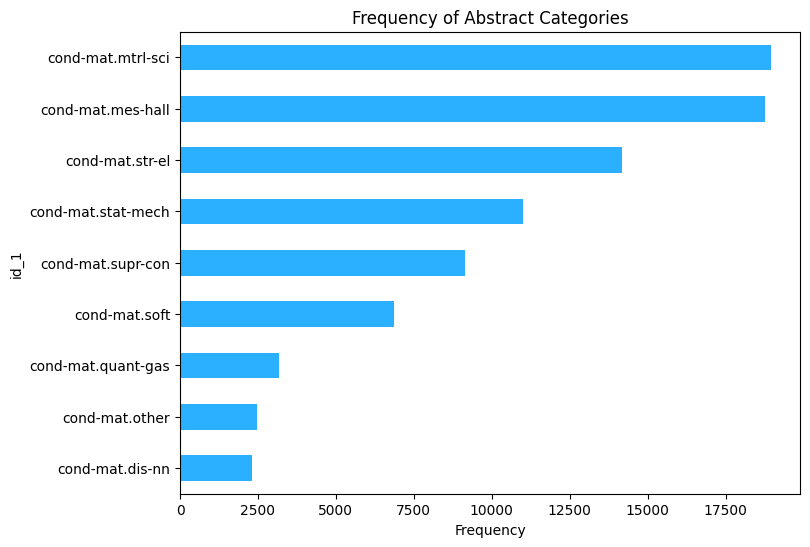

In [5]:
plt.figure(figsize=(8, 6))

# Plotting the bar chart
ax = df['id_1'].value_counts().plot(kind='barh', color='#2ab0ff')

# Invert y-axis for better readability
ax.invert_yaxis()

# Adding title and labels
plt.title('Frequency of Abstract Categories')
plt.xlabel('Frequency')
plt.ylabel('id_1')

# Show the plot
plt.show()

### Preprcessing the Abstratcts before Embedding

To prepare abstracts for BERT embedding, the preprocess_abstract function executes the following steps:
1. **String Verification:** Ensures input is a string, returns an empty string for non-string inputs.
2. **Whitespace Normalization:** Removes carriage returns and new lines, replacing them with spaces for consistent text flow.
3. **Character Filtering:** Employs a regular expression to filter the text, keeping only alphanumeric characters, basic punctuation, and hyphens while ensuring hyphens are not misinterpreted in the pattern.
4. **Stop Word Removal:** Splits the text into words, removing common stop words to reduce noise and focus on meaningful content
5. **Reconstruction:** Joins the filtered words back into a single string, yielding a clean and concise abstract ready for NLP embedding


In [6]:
def preprocess_abstract(abstract):
    if not isinstance(abstract, str):
        return ""  # Return an empty string if the abstract is not a string

    # Remove carriage returns and new lines
    abstract_clean = abstract.replace('\r', ' ').replace('\n', ' ')

    # Correctly positioned hyphen in the regex to avoid the range error
    # Escape the hyphen or place it at the end of the character class to be interpreted literally
    abstract_clean = re.sub(r'[^a-zA-Z0-9.,()-]+', ' ', abstract_clean)

    # Tokenize and remove stop words (assuming stop_words is a set of stopwords)
    words = abstract_clean.split()
    words = [word for word in words if word.lower() not in stop_words]

    # Rejoin words to form the cleaned abstract
    abstract_clean = ' '.join(words)

    return abstract_clean

# Make sure to define or import your stop_words set before calling this function

# Preprocess the 'abstract' column
df['abstract'] = df['abstract'].apply(lambda x: preprocess_abstract(x))

### Analyzing Textual Density and Complexity in Scientific Abstracts before Embedding

To understand the textual content's complexity and density in our dataset, we perform an analysis to calculate the average number of tokens per title and abstract. This process involves the following steps:

1. **Token Counting:** For each entry in the dataset, we count the number of tokens (essentially, words) present in both the `title` and `abstract` columns. This is achieved by splitting the text on spaces, a common delimiter for words in English text, and counting the resulting elements.

2. **Applying the Function:** The counting operation is applied across all rows of the dataset using the `progress_apply` method from the `tqdm library`, which also provides a progress bar for visual feedback on the operation's progress.

3. **Average Calculation:** After obtaining the token counts for every title and abstract, we compute the mean of these counts to find the average number of tokens across all titles and abstracts in the dataset. This provides a statistical insight into the dataset's text length and complexity.

In [7]:
# Calculate the number of tokens in the 'title' column
df['title_token_count'] = df['title'].progress_apply(lambda x: len(str(x).split()))

# Calculate the number of tokens in the 'abstract' column
df['abstract_token_count'] = df['abstract'].progress_apply(lambda x: len(str(x).split()))

  0%|          | 0/86849 [00:00<?, ?it/s]

  0%|          | 0/86849 [00:00<?, ?it/s]

In [8]:
# Now you can calculate the average number of tokens in 'title' and 'abstract'
avg_title_tokens = df['title_token_count'].mean()
avg_abstract_tokens = df['abstract_token_count'].mean()

# Print out the average token counts
print(f"Average number of tokens in titles: {avg_title_tokens}")
print(f"Average number of tokens in abstracts: {avg_abstract_tokens}")

Average number of tokens in titles: 10.443620536793745
Average number of tokens in abstracts: 83.0695229651464


The substantial difference in token count reflects the abstracts' role in conveying detailed information, allowing for a deeper understanding without accessing the full text. These insights are instrumental for further analytical tasks, such as text summarization or topic modeling, indicating the potential complexity and information richness in the abstracts compared to the more straightforward titles.


**Results Reporting:** The average token counts are then printed out, providing clear metrics on the dataset's textual content. For this dataset, 
- `the average number of tokens in titles is approximately` 10.44, indicating relatively short titles.
- `the average number of tokens in abstracts` is about 83.07, reflecting more extensive descriptions and discussions within the abstracts.

#### Cost Comparison of Text Embedding Models: GPT vs. BERT for Processing Abstracts in Scientific Datasets

- The average number of tokens per abstract is approximately `83.069`. 
- Given the dataset size of 86,848 abstracts, the cost of processing this number of tokens using OpenAI's GPT models for embedding, based on the current pricing structure, would be significantly higher than using BERT. 
- As seen from the pricing information, GPT's 'text-embedding-3-small' model costs `$0.00002 per 1K tokens`. Therefore, for our entire dataset, `the embedding cost with GPT would be approximately $144.17`, which is `cost-prohibitive` compared to a local or free BERT implementation.

In [9]:
83 * 86848 * 0.00002 

144.16768000000002

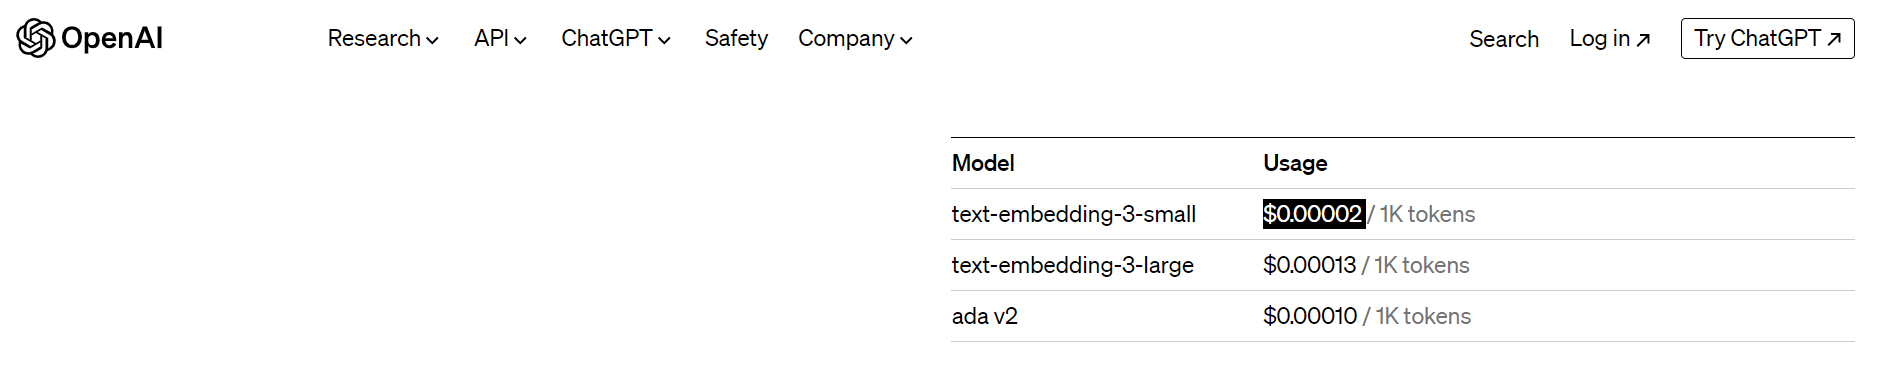

> Total Pricing if we use the Open AI Embedding model is 144.16 dollars

### Selecting a sample of the docs

In [10]:
test_df = df[10001:16000]
test_df

,id_1,title,abstract,title_token_count,abstract_token_count
10001,cond-mat.str-el,Strong coupling theory of heavy fermion critic...,"present theory scaling behavior thermodynamic,...",8,73
10002,cond-mat.mes-hall,Step-like spectral distribution of photoelectr...,study origin step-like shoulder high energy si...,13,114
10003,cond-mat.supr-con,Origin of the ~150 K Anomaly in LaOFeAs; Compe...,first principles calculations find nearest nex...,17,75
10004,cond-mat.mtrl-sci,Four-wave mixing in perovskite photovoltaic ma...,Perovksite semiconductors shown promise low-co...,16,132
10005,cond-mat.mtrl-sci,Response of polar nanoregions in 68%Pb(Mg1/3Nb...,report neutron diffuse scattering measurements...,11,48
...,...,...,...,...,...
15995,cond-mat.str-el,The Spin-Reorientation Transition in TmFeO3,X-ray magnetic circular linear dichroism (XMCD...,5,112
15996,cond-mat.mes-hall,Thermoelectric relations in the conformal limi...,"Fermi liquid description metals, electrical th...",11,45
15997,cond-mat.stat-mech,Interplay between the range of attractive pote...,find interesting interplay range attractive pa...,12,168
15998,cond-mat.str-el,Identification of the low-energy excitations i...,identified low-energy magnetic excitations dop...,10,68


### Embeddings the docs with BERT `recobo/chemical-bert-uncased`

#### Employing BERT for Enhanced Chemical Language Understanding in Document Embeddings

##### **Abstract Transformation with BERT**
In the realm of chemical research, delving into the vast textual data requires advanced techniques to extract meaningful numerical representations. Our approach utilizes `recobo/chemical-bert-uncased`, a BERT-based model fine-tuned with a substantial corpus specific to the chemical industry, to transform abstracts from our `test_df DataFrame` into `embeddings`.

##### **Key Points and Procedure:**

- `Specialized BERT Model:` Leveraging a BERT variant further trained on over 40,000+ technical documents and 13,000+ Wikipedia Chemistry articles, this model is adept at interpreting the nuances of chemical language.
- `Data Selection:` The entire DataFrame, test_df, is designated for embedding, ensuring a comprehensive analysis.
- `Embedding Function:` The create_embeddings function encodes texts using SciBERT's checkpoint and captures the contextualized meaning of each abstract through the mean output of the penultimate hidden layer.
- `Serialization:` Post-embedding, each document's numerical vector is paired with its category ID and serialized into **cond_mat_embeddings_with_ids.pickle**, facilitating efficient data usage in future tasks.
Enhanced Pre-training with MLM
The model's proficiency stems from Masked Language Modeling (MLM), a self-supervised learning technique where 15% of words in a sentence are masked, and the model predicts these words without the sequential bias inherent in RNNs or autoregressive models like GPT.

##### **Integration and Future Implications:**
- The embeddings represent a dataset ready for advanced analyses like clustering, paving the way for innovative property prediction as explored in the article "ChemBERTa: Large-Scale Self-Supervised Pretraining for Molecular Property Prediction" **(https://arxiv.org/abs/2010.09885)**.
- By utilizing this BERT variant, we ensure our model captures the depth of chemical discourse, reflected in over 250,000+ domain-specific tokens and 9.2 million paragraphs, making our embeddings a robust foundation for unveiling intricate patterns in chemical literature.


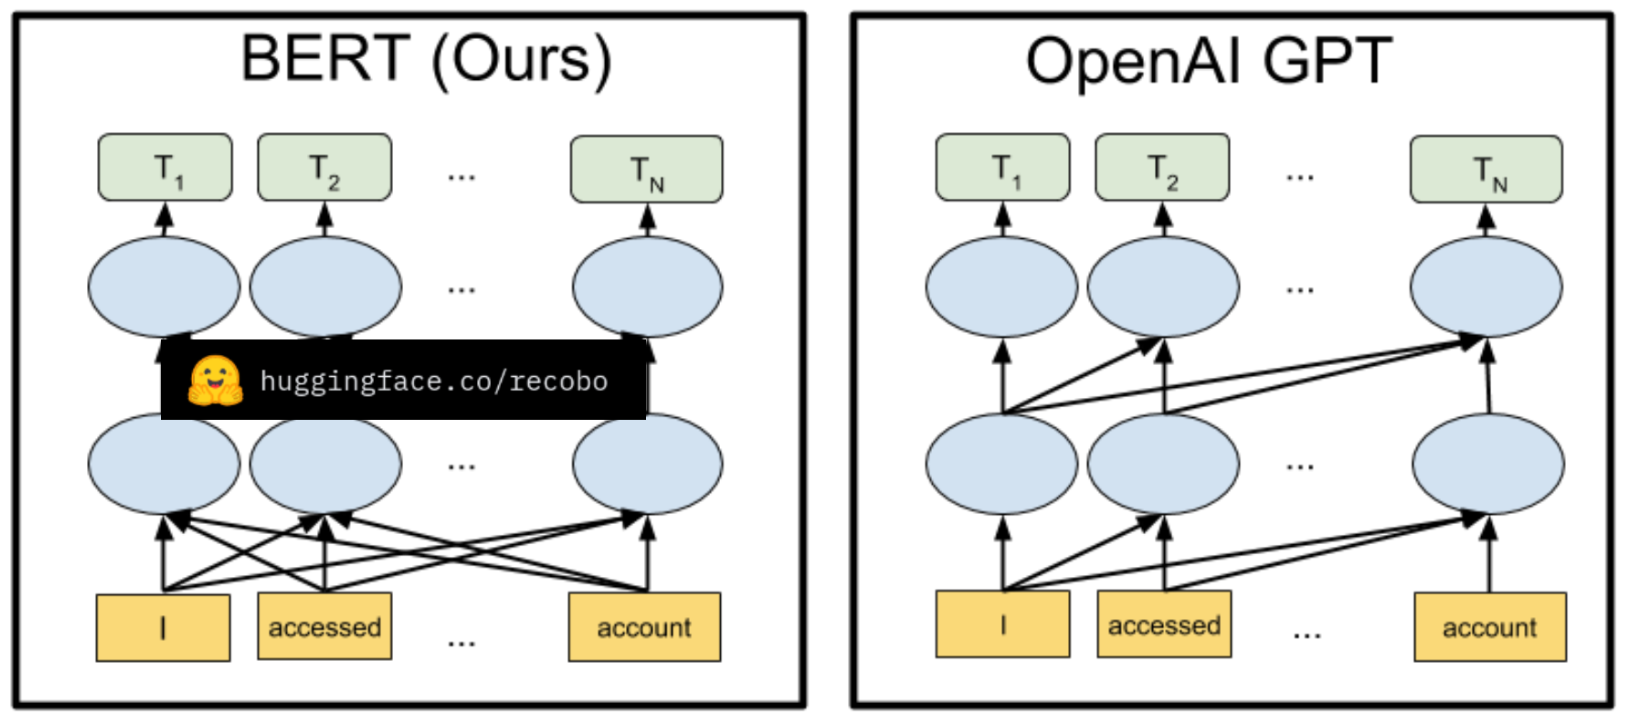 

<center>
    
### Comparative Architectures of BERT and GPT Language Models
</center>



In [11]:
def create_embeddings(model, tokenizer, texts, ids, max_length=512):
    model.eval()  # Put the model in evaluation mode
    data = []

    for text, id_ in tqdm(zip(texts, ids), desc="Generating Embeddings", total=len(texts)):
        # Encode text and convert to torch tensors, truncating or padding to max_length
        inputs = tokenizer(text, padding='max_length', truncation=True, max_length=max_length, return_tensors="pt")

        # Generate embeddings
        with torch.no_grad():
            outputs = model(**inputs)

        # Take the mean of the second to last hidden layer's output to use as the embedding
        embed = outputs.hidden_states[-2].mean(dim=1).squeeze().tolist()  # Convert to list for serialization
        data.append({"object": "embedding", "embedding": embed, "label": id_})

    return {"data": data}

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("recobo/chemical-bert-uncased")
model = AutoModel.from_pretrained("recobo/chemical-bert-uncased", output_hidden_states=True)

# Assuming test_df is your dataframe and is already loaded
abstracts = test_df['abstract'].tolist()
ids = test_df['id_1'].tolist()
embeddings_data = create_embeddings(model, tokenizer, abstracts, ids)

# Save embeddings with ids to a pickle file
pickle_file_path = 'cond_mat_embeddings_with_ids_16000.pickle'
with open(pickle_file_path, 'wb') as f:
    pickle.dump(embeddings_data, f)

print(f"Embeddings with ids have been saved to {pickle_file_path}")

Some weights of BertModel were not initialized from the model checkpoint at recobo/chemical-bert-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Generating Embeddings:   0%|          | 0/5999 [00:00<?, ?it/s]

Embeddings with ids have been saved to cond_mat_embeddings_with_ids_16000.pickle


In [ ]:
test_df1 = df[:5000]
test_df1 = df[5001:10000]
test_df1 = df[10001:16000]
test_df1 = df[16001:21000]
test_df1 = df[21001:25000]


### Segmentation and Embedding: Setting the Stage for Unsupervised Analysis"




## <p style="color:red;"><span style="color:black;">This is Part1️⃣ :  Segmentation and Embedding: Setting the Stage for Unsupervised Analysis"</span></p>

> - At the culmination of this initial phase, we have methodically prepared our dataset for deep analysis. To manage computational resources effectively and ensure a thorough embedding process, we've segmented our extensive dataset into five discrete portions, each containing up to 5,000 abstracts. This segmentation strategy is not merely for convenience; it is essential for maintaining the fidelity of our embeddings while working within the constraints of our current environment.


<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
<b><code>recobo/chemical-bert-uncased model by segments</code></b> For each segment, we've diligently applied the **`recobo/chemical-bert-uncased model`** to generate embeddings. This step is crucial, as it allows us to capture the nuanced chemical language present within the scientific abstracts and translate it into a form amenable to machine learning algorithms. By utilizing BERT's deep learning capabilities, we convert textual information into high-dimensional vectors, encapsulating the semantic richness of the corpus.

The resulting embeddings are meticulously saved into separate pickle files, ensuring the preservation of this valuable transformed data. These files will serve as the foundation for the subsequent analytical steps—dimensionality reduction and clustering.

As we reach the end of this notebook, we set the stage for a 'to be continued' journey into the realms of unsupervised learning, where we will further condense the abstracts' essence via dimensionality reduction techniques and uncover hidden structures within them through clustering.

With the embeddings securely serialized, we confidently transition to the next chapter of our project, where the intricacies of chemical literature will be unraveled, and the underlying patterns brought to light. 


</div>
